# This notebook is for testing the creation of a rainbow action which will do the following:
- Taking starspot parameters (coverage fractions and temperatures) as arguments,
- calculate the wavelength dependent contribution to the measured depth of spectral features detected during transmission spectroscopy of an exoplanet atmosphere
- plot that model "starspot contribution" spectrum ($\Delta$D$_{spot}$($\lambda$))
- Calculate this for WASP-39b
## Other outputs include
- the stellar rotational modulation semi-amplitudes (calculated for a given spot coverage and contrast)
- the total integrated stellar flux (check that Teff^4 = Tspot^4 + Tunspot^4)

In [17]:
from chromatic import *
from rainbowconnection.sources.phoenix import *

# create an example object to test on 
tester = SimulatedRainbow()

# define your new method - calculate delta D_spot (lambda)
def starspot_contribution(wavelength,
                          T_spot = 4000 *u.K,
                          T_unspot = 4500*u.K,
                          f_spot = 0.1,
                          f_tra = 0.,
                          r_sun = 0.5 * u.Rsun,
                          m_sun = 0.5 * u.Msun,
                          transit_depth = 0.06):
    """
    Calculate delta D(lambda), the contribution of 
    starspot features to the wavelength dependent transit depth

    Parameters
    ----------
    T1
        the photosphere temperature, in K
    T2
        the spot temperature, in K
    f_spot
        the global spot coverage fraction
    f_tra
        the transit chord spot coverage fraction
    r_sun
        the stellar radius, in solar radii
    m_sun
        the stellar mass, in solar masses
    """
        
    S_spot = Star(teff=T_spot, radius=r_sun,mass=m_sun,R=1e5,extend_wavelengths=True)
    #w,S_spot = read_phoenix(extend_wavelengths=True)
    #w,S_unspot = read_phoenix(extend_wavelengths=True)
    S_unspot = Star(teff=T_unspot, radius=r_sun,mass=m_sun,R=1e5,extend_wavelengths=True)
    
    s_spot = S_spot.spectrum(wavelength)/np.nanmedian(S_spot.spectrum(wavelength))
    s_unspot = S_unspot.spectrum(wavelength)/np.nanmedian(S_unspot.spectrum(wavelength))
    
    flux_ratio = s_spot/s_unspot
    
    top = (1. - f_tra) + f_tra * flux_ratio
    
    bottom = (1. - f_spot) + f_spot * flux_ratio
    
    delta_D_lam = (top / bottom) - 1
    
    depth = transit_depth * delta_D_lam
    
    return depth

tester, result = starspot_contribution(tester)

print(tester)
print(result)

AttributeError: 'numpy.ndarray' object has no attribute 'spectrum'

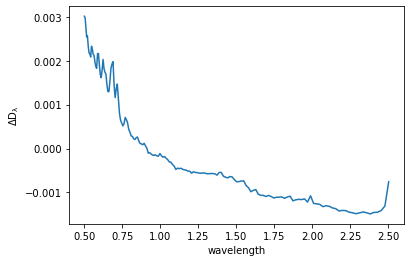

In [15]:
plt.plot(tester.wavelength, result)
plt.xlabel('wavelength')
plt.ylabel(r'$\Delta\rm{D}_{\lambda}$')
plt.show()